___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd

In [2]:
weather=pd.read_csv("weather.csv")

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Temp=weather[["TMIN","TAVG","TMAX"]].describe()
Temp

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

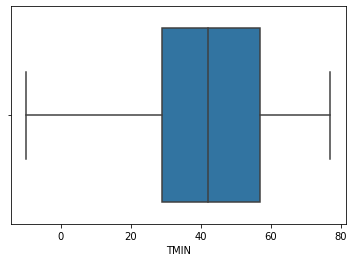

In [6]:
sns.boxplot(weather.TMIN)

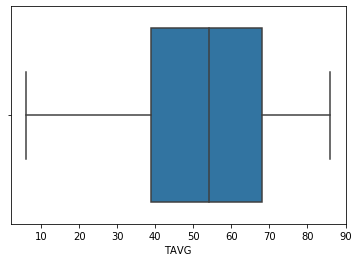

In [7]:
sns.boxplot(weather.TAVG)

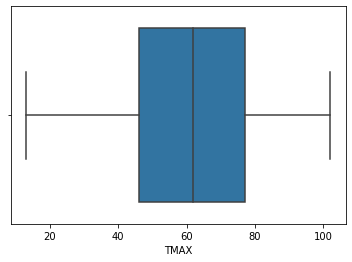

In [8]:
sns.boxplot(weather.TMAX)

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [9]:
TDIFF=pd.DataFrame((weather.TMAX-weather.TMIN),columns = ['Avarage'])
TDIFF.describe()

,Avarage
count,7994.000000
mean,19.149237
std,7.009716
min,-25.000000
25%,14.000000
50%,19.000000
75%,24.000000
max,48.000000


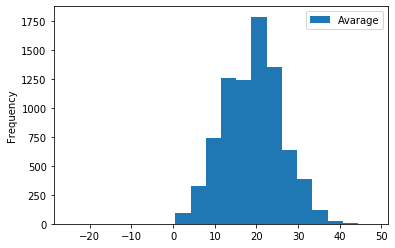

In [10]:
TDIFF.plot.hist(bins=20)

In [11]:
weather.isnull().sum()

STATION       0
DATE          0
AWND       4005
TAVG       6805
TMAX         17
TMIN         26
WT01       6245
WT02       7801
WT03       7795
WT04       7903
WT05       7662
WT06       7997
WT07       7943
WT08       7618
WT09       7953
WT10       8020
WT11       8019
WT13       6847
WT14       7447
WT15       8016
WT16       6696
WT17       8010
WT18       7677
WT19       8018
WT21       8004
WT22       7990
dtype: int64

In [12]:
weather[:2]


,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [13]:
WT=weather.iloc[:,6:]
WT



,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bad_conditions=pd.DataFrame(WT.sum(axis=1), columns=["average"])

In [15]:
bad_conditions

,average
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8017,1.0
8018,0.0
8019,3.0
8020,2.0


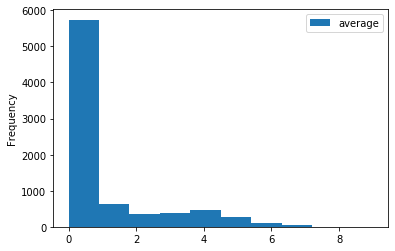

In [16]:
bad_conditions.plot.hist()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [17]:
bad_conditions.sort_index

<bound method DataFrame.sort_index of       average
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
8017      1.0
8018      0.0
8019      3.0
8020      2.0
8021      1.0

[8022 rows x 1 columns]>

In [18]:
mapping2={0:"good",1:"bad",2:"bad",3:"bad",4:"bad",5:"worse",6:"worse",7:"worse",8:"worse",9:"worse"}

In [19]:
newlist=bad_conditions.replace(mapping2)

In [20]:
newlist

,average
0,good
1,good
2,good
3,good
4,good
...,...
8017,bad
8018,good
8019,bad
8020,bad


In [21]:
bad_conditions["rating"]=pd.Series(newlist.average)
bad_conditions

,average,rating
0,0.0,good
1,0.0,good
2,0.0,good
3,0.0,good
4,0.0,good
...,...,...
8017,1.0,bad
8018,0.0,good
8019,3.0,bad
8020,2.0,bad


***

In [22]:
bad_conditions[["rating","average"]].groupby("rating").count()

,average
rating,
bad,1852
good,5738
worse,432


## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [23]:
bad_conditions.dtypes

average    float64
rating      object
dtype: object

In [24]:
cats=['good', 'bad', 'worse']

In [25]:
bad_conditions["rating"]=bad_conditions["rating"].astype("category")

In [26]:
bad_conditions.dtypes

average     float64
rating     category
dtype: object

In [27]:
import pandas as pd

In [28]:
ri=pd.read_csv("police.csv")

C:\Users\MUSTAFA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
ri.drop(["county_name","state","county_fips","fine_grained_location"], axis=1, inplace=True)

In [30]:
ri.dropna(subset=["driver_gender"], inplace=True)

In [31]:
ri["stop_datetime"]=ri["stop_date"]+' '+ri["stop_time"]

In [32]:
ri["stop_datetime"]=pd.to_datetime(ri["stop_datetime"])

In [33]:
ri.reset_index().set_index('stop_datetime', drop=True)

,index,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:46:00,509666,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
2015-12-31 22:47:00,509667,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2015-12-31 23:08:00,509668,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3


In [34]:
ri.reset_index()

,index,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2,3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
3,4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
4,5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480579,509666,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,...,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1,2015-12-31 22:46:00
480580,509667,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2015-12-31 22:47:00
480581,509668,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08:00
480582,509669,RI-2015-47064,2015-12-31,23:44,Zone K2,900,M,1984.0,31.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44:00


In [35]:
bad_conditions.rating

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): [bad, good, worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

In [36]:
weather_rating=pd.concat([weather.DATE,bad_conditions.rating],axis=1)
weather_rating=weather_rating.rename(columns={"DATE":"stop_date"})
weather_rating

,stop_date,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [37]:
ri.stop_date

0         2005-01-02
1         2005-01-02
3         2005-01-04
4         2005-01-06
5         2005-01-12
             ...    
509666    2015-12-31
509667    2015-12-31
509668    2015-12-31
509669    2015-12-31
509670    2015-12-31
Name: stop_date, Length: 480584, dtype: object

In [38]:
weather_rating.shape

(8022, 2)

In [39]:
ri.shape

(480584, 23)

In [40]:
ri_weather2=pd.merge(ri,weather_rating, on="stop_date")

In [41]:
ri_weather=ri_weather2.head(480584)
ri_weather.shape

(480584, 24)

In [42]:
ri_weather.is_arrested.sum()

18151

In [58]:
ri_weather.is_arrested[ri_weather["rating"]=="good"].sum()

12527

In [68]:
import numpy as np

In [86]:
ri_weather.groupby(["rating"])["is_arrested"].sum()

rating
bad       4073
good     12527
worse     1551
Name: is_arrested, dtype: int64

In [87]:
arrest_rate=ri_weather.groupby(["violation","rating"])["is_arrested"].sum()

In [44]:
ri_weather.is_arrested[ri_weather["rating"]=="bad"].sum() 

4073

In [45]:
ri_weather.is_arrested[ri_weather["rating"]=="worse"].sum()

1551

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [89]:
arrest_rate

violation            rating
Equipment            bad        747
                     good      2319
                     worse      339
Moving violation     bad       1233
                     good      3707
                     worse      461
Other                bad        475
                     good      1439
                     worse      191
Registration/plates  bad        522
                     good      1466
                     worse      168
Speeding             bad       1096
                     good      3596
                     worse      392
Name: is_arrested, dtype: int64

In [93]:
arrest_rate["Moving violation","bad"]

1233

In [94]:
arrest_rate["Speeding"]

rating
bad      1096
good     3596
worse     392
Name: is_arrested, dtype: int64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [100]:
pd.DataFrame(arrest_rate).unstack()

is_arrested            
rating                      bad  good worse
violation                                  
Equipment                   747  2319   339
Moving violation           1233  3707   461
Other                       475  1439   191
Registration/plates         522  1466   168
Speeding                   1096  3596   392